<a href="https://colab.research.google.com/github/JoaoCampagnolo/JoaoCampagnolo/blob/main/Copy_of_3D_zebrafish_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/11651033/211620835-594097d9-6a96-4e37-99e8-2d827d3b232b.png"
style="float:right">


# Clone git repository
### Load scripts and datasets from git repository
##### *Execution time: 1 minute*

In [ ]:
#@title
!git clone https://github.com/AniketRavan/3D-fish-pose.git
!git pull https://github.com/AniketRavan/3D-fish-pose.git

Cloning into '3D-fish-pose'...
remote: Enumerating objects: 12662, done.
remote: Counting objects: 100% (3880/3880), done.
remote: Compressing objects: 100% (2178/2178), done.
remote: Total 12662 (delta 1762), reused 3783 (delta 1689), pack-reused 8782
Receiving objects: 100% (12662/12662), 720.37 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (7442/7442), done.
Updating files: 100% (10612/10612), done.
fatal: not a git repository (or any of the parent directories): .git


# Install condacolab
##### *Execution time: 30 seconds*

In [ ]:
#@title
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


# Create environment
### The following section will install all the required libraries
##### *Execution time: 2 minutes*

In [ ]:
#@title
%cd /content/3D-fish-pose/src_pose_3D_single_model
!conda env create -f fish_env.yaml
;

/content/3D-fish-pose/src_pose_3D_single_model
Channels:
 - open-ce
 - https://public.dhe.ibm.com/ibmdl/export/pub/software/server/ibm-ai/conda
 - https://ftp.osuosl.org/pub/open-ce/1.5.1
 - conda-forge
 - pytorch
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | failed
Channels:
 - open-ce
 - https://public.dhe.ibm.com/ibmdl/export/pub/software/server/ibm-ai/conda
 - https://ftp.osuosl.org/pub/open-ce/1.5.1
 - conda-forge
 - pytorch
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / - \ failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides requested abseil-cpp ==20210324.2 h3b9df90_0
  - nothing provides requested aiohttp ==3.8.1 py39h9ca6cee_1
  - nothing provides requested argon2-cffi-bindings ==21.2.0 py39ha810350_1
  - nothing provides requested arrow-cpp ==5.0.0 py39ha9c67ab_3_cpu
  - nothing provides requested av ==8.0.3 py39h2698049_3
  - nothing provides requested blosc ==1.21.1 h

''

# Import libraries
### Here, we import all the installed required libraries
##### *Execution time: 5 seconds*

In [ ]:
#@title
%cd /content/3D-fish-pose/src_pose_3D_single_model
import torch
import torchvision
import torch.optim as optim
import argparse
import matplotlib.pyplot as plt
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from CustomDataset_images_only import CustomImageDataset
from ResNet_Blocks_3D_4blocks import resnet18
import time
import multiprocessing as mp
from itertools import repeat
import os
import scipy.io as sio
from scipy.optimize import least_squares
import numpy as np
import time
import resource
import pdb
import math
import time

/content/3D-fish-pose/src_pose_3D_single_model


# Run validation
#### The following cell performs pose prediction on a random example from 1000 frames. All the frames are selected from free swimming experiments. Run this cell repeatedly to visualize the pose predictions on different examples
##### *Execution time: 0.5 seconds*

Cuda is not available
Found 1000 files
Evaluating im_111417_1709_01_064.png for pose prediction
0.5501439571380615


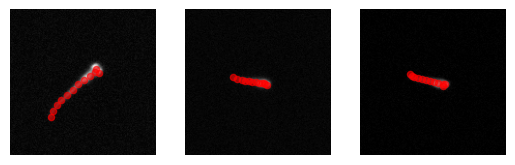

In [ ]:
#@title
t = time.time()
%run runme_validate_single_frame_colab.py -e 1 -p {"proj_params_201711_corrected.mat"} -m {"resnet_pose_220904_2_best_lambda_5.pt"} -s "fs/"
print(time.time() - t)
_,axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(im_three_channels[0,0,:,:].cpu(), cmap = 'gray')
axs[0].scatter(pose_recon_b[0,0,0:12].cpu(), pose_recon_b[0,1,0:12].cpu(), s=20, c='red', alpha=0.6)
axs[0].grid(False)
axs[0].set_axis_off()
axs[1].imshow(im_three_channels[0,1,:,:].cpu(), cmap = 'gray')
axs[1].scatter(pose_recon_s1[0,0,0:12].cpu(), pose_recon_s1[0,1,0:12].cpu(), s=20, c='red', alpha=0.6)
axs[1].grid(False)
axs[1].set_axis_off()
axs[2].imshow(im_three_channels[0,2,:,:].cpu(), cmap = 'gray')
axs[2].scatter(pose_recon_s2[0,0,0:12].cpu(), pose_recon_s2[0,1,0:12].cpu(), s=20, c='red', alpha=0.6)
axs[2].grid(False)
axs[2].set_axis_off()
plt.rcParams["figure.figsize"] = (48,16)
plt.show()